# Abstract

The purpose of this notebook is to allow users to become familiar with model fitting in a Google colaboratory (colab) environment using Jupyter notebooks. The programming code is R, not Python. For additional resources:

*   [Introduction to Google Colab](https://www.tutorialspoint.com/google_colab/index.htm), website
*   [Introduction to Jupyter Notebooks.ipynb](https://github.com/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/Introduction%20to%20Jupyter%20Notebooks.ipynb), Jupyter notebook available from the course Github repository (repo).


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/OpenActTextDev/ActuarialRegression/blob/main/Notebooks/MEPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>





#  Getting Started

Start by going to "Runtime", select "Change Runtime Type", ensure that "R" is selected, and click "Save".

Next, run the following two boxes. The first checks that we can do basic calculations. The second is an "R" command (generate 10 standard normal random variates), to make sure that "R" is working. Then, try changing the numbers so you can convince yourself that this is an interactive environment.

In [ ]:
1 + 4

[1] 5

In [ ]:
rnorm(10)

[1] -0.06237723  0.01586137 -0.41380186  1.81900078 -0.13186520  0.12156746
 [7]  0.78397754 -0.73694762  0.22139165 -0.62107085

You can make changes to a Colab notebook, and they will persist for as long as you keep your browser tab open. But once you close it, the changes will be lost. To avoid this, make sure you save a copy of the notebook to your Google Drive by selecting File → “Save a copy in Drive”.

## Load Libraries

As is the custom with Jupyter notebooks, we start by loading some libraries that are going to be helpful. In the following code, we also indicate where the libraries are needed with comments.

In [ ]:
install.packages("Hmisc")
library(Hmisc)
install.packages("doBy")
library(doBy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’




# Import and Describe the Data

First, we import the data from Github course repo. At the repo "https://github.com/OpenActTextDev/ActuarialRegression", you will see other datasets.

In [ ]:
Hexpend <- read.csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CSVData/HealthExpend.csv", header=TRUE)

Just to make sure that data was read in properly, let's look at the structure and do a summary.

In [ ]:
str(Hexpend)
summary(Hexpend)

'data.frame':	2000 obs. of  28 variables:
 $ AGE        : int  30 56 55 47 50 45 25 61 50 19 ...
 $ ANYLIMIT   : int  0 1 1 0 0 0 0 0 0 0 ...
 $ COLLEGE    : int  0 0 1 1 1 1 0 0 1 0 ...
 $ HIGHSCH    : int  0 1 0 0 0 0 1 1 0 0 ...
 $ GENDER     : int  0 0 0 1 1 1 0 1 0 1 ...
 $ MNHPOOR    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ insure     : int  0 1 1 1 1 1 1 0 1 1 ...
 $ USC        : int  0 1 1 1 1 1 0 1 1 0 ...
 $ UNEMPLOY   : int  0 1 0 0 1 1 0 0 0 0 ...
 $ MANAGEDCARE: int  0 1 0 0 1 1 1 0 0 1 ...
 $ famsize    : int  3 3 2 2 1 4 1 2 6 6 ...
 $ COUNTIP    : int  0 0 2 0 0 0 0 0 0 0 ...
 $ EXPENDIP   : num  0 0 16121 0 0 ...
 $ COUNTOP    : int  0 5 42 4 43 5 0 4 0 24 ...
 $ EXPENDOP   : num  0 2385 29730 110 3299 ...
 $ RACE       : chr  "WHITE" "BLACK" "WHITE" "BLACK" ...
 $ RACE1      : int  4 2 4 2 4 4 4 4 4 4 ...
 $ REGION     : chr  "MIDWEST" "SOUTH" "MIDWEST" "NORTHEAST" ...
 $ REGION1    : int  2 3 2 1 0 2 0 2 0 0 ...
 $ EDUC       : chr  "LHIGHSC" "HIGHSCH" "COLLEGE" "COLLEGE" .

      AGE           ANYLIMIT        COLLEGE         HIGHSCH     
 Min.   :18.00   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:28.00   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :39.00   Median :0.000   Median :0.000   Median :0.000  
 Mean   :39.03   Mean   :0.223   Mean   :0.272   Mean   :0.433  
 3rd Qu.:49.00   3rd Qu.:0.000   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :65.00   Max.   :1.000   Max.   :1.000   Max.   :1.000  
     GENDER         MNHPOOR           insure            USC        
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :1.000   Median :0.0000   Median :1.0000   Median :1.0000  
 Mean   :0.527   Mean   :0.0745   Mean   :0.7775   Mean   :0.6875  
 3rd Qu.:1.000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    UNEMPLOY       MANAGEDCARE        famsize          COUNTIP      


This is table appears in the book (Section 11.1). This book is freely available in Spanish, [Modelado de Regresión con Aplicaciones Actuariales y Financieras](https://openacttextdev.github.io/RegressionSpanish/index.html).

In [ ]:
row1 <- c("Not hospitalized" , "y=0" , "902 (95.3%)" , "941 (89.3%)" )
row2 <- c("Hospitalized" , "y=1 ",  "44 (4.7%)"  , "113 (10.7%)" )
row3 <- c("Total" ,  "", "946"  , "1,054" )
tableout <- rbind(row1, row2, row3)
row.names(tableout) <- NULL
colnames(tableout) <- c("", "", "Male", "Female")
tableout


,,Male,Female
Not hospitalized,y=0,902 (95.3%),941 (89.3%)
Hospitalized,y=1,44 (4.7%),113 (10.7%)
Total,,946,"1,054"


We can get some quick summaries with the 'table' function in 'R'.

In [ ]:
POSEXP = 1*(Hexpend$EXPENDIP>0)
table(POSEXP)
table(Hexpend$GENDER)

POSEXP
   0    1 
1843  157 


   0    1 
 946 1054 

However, for more complex summarizes, we utilize a library "Hmisc". These needs to be first **installed**, which may take a couple of minutes in Google Colab.

In [ ]:
#install.packages("Hmisc")
#library(Hmisc)
Hmisc::summarize(POSEXP, Hexpend$GENDER, mean)

,Hexpend$GENDER,POSEXP
,<labelled>,<labelled[1d]>
1,0,0.04651163
2,1,0.10721063


Here is some output that we can get from "Hmisc." This example also illustrates how to create functions in "R".

In [ ]:
#  CREATE A SHORT FUNCTION TO SAVE WORK
fun1 <- function(y){
  options(digits=3)
  temp0 <- cbind(table(y)/length(y),Hmisc::summarize(POSEXP, y, mean))
  temp <- temp0[c(2,1),]
  temp[,c(2,4)] <- round(temp[,c(2,4)], digits=3)
return(cbind(temp[,3],temp[,2],temp[,4]))}

var1 <- fun1(Hexpend$GENDER)
var2 <- fun1(Hexpend$RACE)
var3 <- fun1(Hexpend$REGION)
var4 <- fun1(Hexpend$EDUC)
var5 <- fun1(Hexpend$PHSTAT)
#var6 <- fun1(Hexpend$MPOOR)
var7 <- fun1(Hexpend$ANYLIMIT)
var8 <- fun1(Hexpend$INCOME)
var9 <- fun1(Hexpend$insure)
tableout <- rbind(var1, var2, var3, var4,
                  var5, var7, var8, var9)
tableout

1,0.527,0.107
0,0.473,0.047
BLACK,0.148,0.105
ASIAN,0.043,0.047
NORTHEAST,0.143,0.101
MIDWEST,0.196,0.087
HIGHSCH,0.433,0.079
COLLEGE,0.272,0.068
FAIR,0.098,0.081
EXCE,0.254,0.051
1,0.223,0.146


# Linear Regression Model

Just to get started, let us fit a linear regression model, using inpatient expenditures (EXPENDIP) as the target (response) variable.

Because of the very large proportion of zeros (corresponding to no expenditures) and long-tail nature of positive expenditures, this naive approach is generally not a good one.

In [ ]:
model1 = lm(EXPENDIP~AGE+GENDER + # COUNTIP+
    factor(RACE)+factor(REGION)+factor(EDUC)+factor(PHSTAT) +
    MNHPOOR+ANYLIMIT+factor(INCOME)+insure, data = Hexpend)

sum4 <- summary(model1)
sum4$r.squared
tableout <- round(sum4$coefficients[,1:3], digits = 2)
colnames(tableout) <- c("Coefficient", "Standard Error", "$t$-Statistic")
knitr::kable(tableout,  booktabs = T, digits=2)
knitr::kable(anova(model1),  booktabs = T, digits=2)

[1] 0.0168



|                        | Coefficient| Standard Error| $t$-Statistic|
|:-----------------------|-----------:|--------------:|-------------:|
|(Intercept)             |     1349.05|         2258.5|          0.60|
|AGE                     |      -38.97|           26.1|         -1.49|
|GENDER                  |     -411.57|          640.5|         -0.64|
|factor(RACE)BLACK       |      213.34|         1775.9|          0.12|
|factor(RACE)NATIV       |      -44.84|         3373.8|         -0.01|
|factor(RACE)OTHER       |     -228.92|         2896.1|         -0.08|
|factor(RACE)WHITE       |      384.70|         1572.5|          0.24|
|factor(REGION)NORTHEAST |    -1850.44|         1099.8|         -1.68|
|factor(REGION)SOUTH     |    -1723.80|          893.7|         -1.93|
|factor(REGION)WEST      |    -2138.81|          946.9|         -2.26|
|factor(EDUC)HIGHSCH     |      109.87|          805.4|          0.14|
|factor(EDUC)LHIGHSC     |     1516.30|          970.1|          1.56|
|fac



|               |   Df|   Sum Sq|  Mean Sq| F value| Pr(>F)|
|:--------------|----:|--------:|--------:|-------:|------:|
|AGE            |    1| 8.73e+06| 8.73e+06|    0.04|   0.83|
|GENDER         |    1| 3.49e+07| 3.49e+07|    0.18|   0.67|
|factor(RACE)   |    4| 7.95e+07| 1.99e+07|    0.10|   0.98|
|factor(REGION) |    3| 1.13e+09| 3.77e+08|    1.91|   0.13|
|factor(EDUC)   |    2| 7.10e+08| 3.55e+08|    1.80|   0.17|
|factor(PHSTAT) |    4| 2.08e+09| 5.21e+08|    2.64|   0.03|
|MNHPOOR        |    1| 1.43e+07| 1.43e+07|    0.07|   0.79|
|ANYLIMIT       |    1| 1.73e+09| 1.73e+09|    8.76|   0.00|
|factor(INCOME) |    4| 4.31e+08| 1.08e+08|    0.55|   0.70|
|insure         |    1| 4.42e+08| 4.42e+08|    2.24|   0.13|
|Residuals      | 1977| 3.89e+11| 1.97e+08|      NA|     NA|

A regression model for fitting inpatient expenditures (EXPENDIP) produces poor results. For example, The $R^2 < 2 \%$.

The statistical significance of ANYLIMIT is due to a single observation.

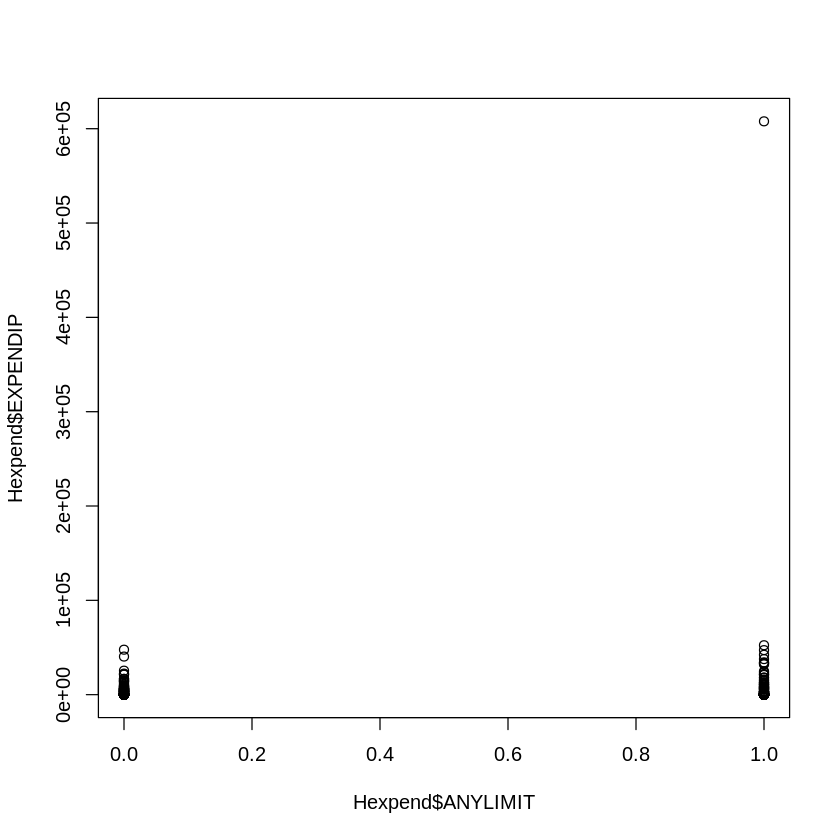

In [ ]:
plot(Hexpend$ANYLIMIT, Hexpend$EXPENDIP)

#  Logistic Regression

In [ ]:
#  Table 11.5
Hexpend$POSEXP = 1*(Hexpend$EXPENDIP>0)

#  CHANGE REFERENCE LEVELS TO AGREE WITH BOOK (DONE IN SAS)
attach(Hexpend)
RACE = relevel(factor(RACE),ref="WHITE")
REGION = relevel(factor(REGION),ref="WEST")
EDUC = relevel(factor(EDUC),ref="LHIGHSC")
PHSTAT = relevel(factor(PHSTAT),ref="EXCE")
INCOME = relevel(factor(INCOME),ref="POOR")

# FULL LOGIT MODEL;
PosExpglmFull = glm(POSEXP~AGE+GENDER
 +factor(RACE)+ factor(REGION)+factor(EDUC)
 +factor(PHSTAT)+ANYLIMIT+factor(INCOME)
 +insure, family=binomial(link=logit))
#summary(PosExpglmFull)
Table1 <- summary(PosExpglmFull)
Table1Red <- round(Table1$coefficients[,c(1,3)], digits=3)
Table1Red

The following object is masked _by_ .GlobalEnv:

    POSEXP




,Estimate,z value
(Intercept),-4.239,-8.981
AGE,-0.001,-0.170
GENDER,0.734,3.815
factor(RACE)ASIAN,-0.222,-0.417
factor(RACE)BLACK,-0.004,-0.017
factor(RACE)NATIV,0.602,0.913
factor(RACE)OTHER,-0.215,-0.320
factor(REGION)MIDWEST,0.518,1.887
factor(REGION)NORTHEAST,0.605,2.099
factor(REGION)SOUTH,0.332,1.355


Here is a reduced model with a few variables removed.

In [ ]:
# REDUCED LOGIT MODEL;
PosExpglmRed = glm(POSEXP~GENDER + factor(RACE) +
        +factor(REGION)+factor(EDUC)
 +factor(PHSTAT)+ANYLIMIT+factor(INCOME)
 +insure, family=binomial(link=logit))
#summary(PosExpglmRed)
Table2 <- summary(PosExpglmRed)
Table2Red <- round(Table2$coefficients[,c(1,3)], digits = 3)
Table2Red
anova(PosExpglmRed,PosExpglmFull, test="Chisq")

,Estimate,z value
(Intercept),-4.274,-10.082
GENDER,0.735,3.817
factor(RACE)ASIAN,-0.223,-0.418
factor(RACE)BLACK,-0.002,-0.008
factor(RACE)NATIV,0.607,0.920
factor(RACE)OTHER,-0.214,-0.319
factor(REGION)MIDWEST,0.517,1.882
factor(REGION)NORTHEAST,0.603,2.092
factor(REGION)SOUTH,0.330,1.348
factor(EDUC)COLLEGE,0.068,0.253


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1979,977,NA,NA,NA
2,1978,977,1,0.0291,0.865


The Tabla 11.5 summary in the book [Modelado de Regresión con Aplicaciones Actuariales y Financieras](https://openacttextdev.github.io/RegressionSpanish/C11Binary.html#S:Sec114) is a bit easier to read.

#  Generalized Linear Models

Let's first take a look at the distribution of expenditures.

This is **Figure 13.1** of the book entitled *Smooth Empirical Histogram of Positive Inpatient Expenditures.* For visualization purposes, the largest expenditure is omitted.

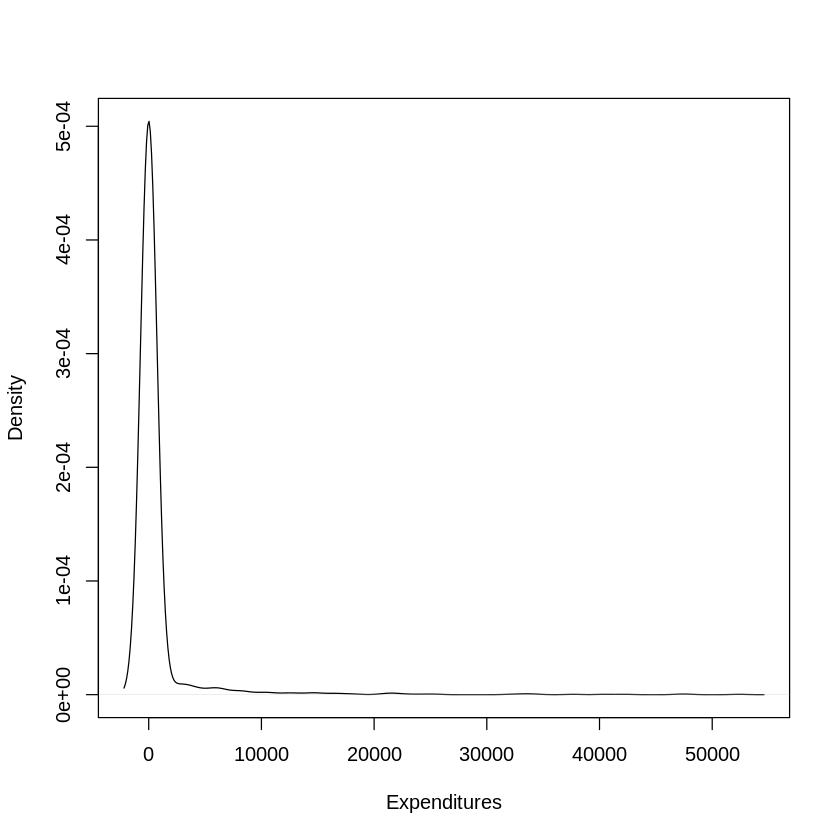

In [ ]:
# TEMPORARILY REMOVE OBS # 58

Hexpend58 <- subset(Hexpend, !(EXPENDIP>600000))
plot(density(Hexpend58$EXPENDIP), main="", xlab="Expenditures")

Now we examine the median by level of covariates, to try to understand which features might be important determinants of expenditures.

In [ ]:
#install.packages("doBy")
#library(doBy)
#  Table 13.5
#Hexpend$POSEXP <- 1*(Hexpend$EXPENDIP>0)
HexpendPos  <- subset(Hexpend, EXPENDIP > 0)

#  CREATE A SHORT FUNCTION TO SAVE WORK
fun2 <- function(group_var, summary_vars){
    # Convert group_var and summary_vars to character if they are not
  group_var <- as.character(substitute(group_var))
  summary_vars <- as.character(substitute(summary_vars))
temp <- doBy::summaryBy(
  formula = as.formula(paste(summary_vars, "~", group_var)),
        data = HexpendPos,
           FUN = function(x) { c(m = median(x), num = length(x)) } )
temp1 <- temp[,c(1,3,2)]
temp1[,2] <- round(100*temp1[,2]/length(HexpendPos$EXPENDIP), digits=1)
colnames(temp1) <- NULL
temp1[,1] <- as.character(temp1[,1])
return(as.matrix(temp1) )
}

var1 <- fun2(GENDER,EXPENDIP)
var2 <- fun2(RACE,EXPENDIP)
var3 <- fun2(REGION,EXPENDIP)
var4 <- fun2(EDUC,EXPENDIP)
var5 <- fun2(PHSTAT,EXPENDIP)
#var6 <- fun2(MPOOR,EXPENDIP)
var7 <- fun2(ANYLIMIT,EXPENDIP)
var8 <- fun2(INCOME,EXPENDIP)
var9 <- fun2(insure,EXPENDIP)

tableout <- rbind(var1, var2, var3, var4,
                  var5, var7, var8, var9)
tableout
#TableGen1(TableData=tableout,
#         TextTitle='Median Expenditures by Explanatory Variable  Based on a Sample of $n=157$ with Positive Expenditures',
#         Align='crr', ColumnSpec=1:3, ColWidth = ColWidth4 )

1,0,28,7313
2,1,72,5546
1,ASIAN,2.5,4003
2,BLACK,19.7,6100
3,NATIV,1.9,2310
4,OTHER,1.9,4051
5,WHITE,73.9,5725
1,MIDWEST,21.7,7999
2,NORTHEAST,18.5,5833
3,SOUTH,40.8,5595
4,WEST,19.1,4297


Here is the fit of a gamma regression model with all variables.

In [ ]:
#  Table 13.6
HexpendPos  <- subset(Hexpend, EXPENDIP > 0)

#  MODEL WITH ALL VARIABLES
#  HAD TO INCREASE THE DEFAULT NUMBER OF ITERATIONS FOR CONVERGENCE
model1 = glm(EXPENDIP~COUNTIP+AGE+GENDER
    +factor(RACE)+factor(REGION)+factor(EDUC)+factor(PHSTAT)
    +MNHPOOR+ANYLIMIT+factor(INCOME)+insure,
    control = glm.control(maxit = 50),
    data=HexpendPos,family=Gamma(link="log"))
output1 <- summary(model1 )
tidy_model <- broom::tidy(model1)
tidy_model


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.21093,0.66412,9.3521,2.75e-16
COUNTIP,0.68207,0.09361,7.2866,2.53e-11
AGE,0.02057,0.00688,2.9890,3.34e-03
GENDER,-0.23783,0.17207,-1.3822,1.69e-01
factor(RACE)BLACK,0.18240,0.51238,0.3560,7.22e-01
factor(RACE)NATIV,-0.69740,0.73213,-0.9526,3.43e-01
factor(RACE)OTHER,0.72636,0.70706,1.0273,3.06e-01
factor(RACE)WHITE,0.51295,0.48134,1.0657,2.89e-01
factor(REGION)NORTHEAST,-0.62758,0.23754,-2.6420,9.23e-03


With reduced variables.

In [ ]:
#  REDUCED MODEL
HexpendPos$BLACK = (HexpendPos$RACE == "BLACK")
HexpendPos$POOR = (HexpendPos$PHSTAT == "POOR")
HexpendPos$POORNEG = (HexpendPos$INCOME == "POOR")
model2 <- glm(EXPENDIP ~ COUNTIP + AGE + GENDER +
    factor(BLACK) + factor(REGION) + factor(EDUC) + factor(POOR) +
    MNHPOOR + ANYLIMIT + factor(POORNEG),
    data=HexpendPos, family=Gamma(link="log") )
summary(model2)
anova(model1, model2)


Call:
glm(formula = EXPENDIP ~ COUNTIP + AGE + GENDER + factor(BLACK) + 
    factor(REGION) + factor(EDUC) + factor(POOR) + MNHPOOR + 
    ANYLIMIT + factor(POORNEG), family = Gamma(link = "log"), 
    data = HexpendPos)

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              7.83802    0.39992   19.60  < 2e-16 ***
COUNTIP                  0.67226    0.09962    6.75  3.5e-10 ***
AGE                      0.01531    0.00689    2.22   0.0280 *  
GENDER                  -0.11842    0.18328   -0.65   0.5192    
factor(BLACK)TRUE       -0.25770    0.20908   -1.23   0.2198    
factor(REGION)NORTHEAST -0.66219    0.25185   -2.63   0.0095 ** 
factor(REGION)SOUTH     -0.34000    0.21269   -1.60   0.1121    
factor(REGION)WEST      -0.44784    0.25101   -1.78   0.0765 .  
factor(EDUC)HIGHSCH      0.25872    0.20498    1.26   0.2089    
factor(EDUC)LHIGHSC      0.46874    0.23487    2.00   0.0479 *  
factor(POOR)TRUE         0.16672    0.24508    0

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,133,124,NA,NA,NA,NA
2,143,138,-10,-13.9,1.85,0.0576


In [ ]:
#Hexpend58 <- subset(HexpendPos, !(EXPENDIP>600000))
#  REDUCED MODEL - INVERSE GAUSSIAN
#  DOES NOT WANT TO CONVERGE !!
# model3 <- glm(EXPENDIP ~ COUNTIP + AGE + GENDER +
#     factor(BLACK) + factor(REGION) + factor(EDUC) + factor(POOR) +
#     MNHPOOR + ANYLIMIT + factor(POORNEG),  control = glm.control(maxit = 100),
#     data=Hexpend58, family=inverse.gaussian(link = "log") )
# summary(model3)
#   ALSO PROBLEMS WITH family=inverse.gaussian(link = "1/mu^2")